<a href="https://colab.research.google.com/github/diazoniclabs/Microland/blob/main/Transfer_Learning_Advanced.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import os

In [2]:
import pathlib
import tensorflow as tf
url = "https://storage.googleapis.com/download.tensorflow.org/example_images/flower_photos.tgz"
data_dir = tf.keras.utils.get_file('flower_photos',origin=url,untar=True)
data_dir = pathlib.Path(data_dir)

228813984/228813984 [==============================] - 2s 0us/step


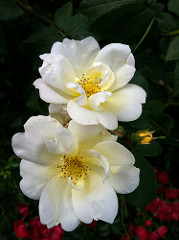

In [3]:
from google.colab.patches import cv2_imshow
import cv2

img = cv2.imread('/root/.keras/datasets/flower_photos/roses/10090824183_d02c613f10_m.jpg')

cv2_imshow(img)

In [4]:
data_dir

PosixPath('/root/.keras/datasets/flower_photos')

In [5]:
train_ds = tf.keras.utils.image_dataset_from_directory(data_dir,validation_split=0.2,seed=42,
                                                       subset='training',image_size=(180,180))

Found 3670 files belonging to 5 classes.
Using 2936 files for training.


In [6]:
val_ds = tf.keras.utils.image_dataset_from_directory(data_dir,validation_split=0.2,seed=42,
                                                       subset='validation',image_size=(180,180))

Found 3670 files belonging to 5 classes.
Using 734 files for validation.


In [7]:
class_labels = train_ds.class_names
class_labels

['daisy', 'dandelion', 'roses', 'sunflowers', 'tulips']

In [8]:
# Training the model
import tensorflow as tf

final_model = tf.keras.models.Sequential()

resnet_model = tf.keras.applications.ResNet50(include_top=False,classes=5,input_shape=(180,180,3))
for layer in resnet_model.layers:
  layer.trainable=False

final_model.add(resnet_model)

final_model.add(tf.keras.layers.Flatten())
final_model.add(tf.keras.layers.Dense(512,activation='relu'))
final_model.add(tf.keras.layers.Dense(5,activation='softmax'))
final_model.summary()

94765736/94765736 [==============================] - 1s 0us/step
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resnet50 (Functional)       (None, 6, 6, 2048)        23587712  
                                                                 
 flatten (Flatten)           (None, 73728)             0         
                                                                 
 dense (Dense)               (None, 512)               37749248  
                                                                 
 dense_1 (Dense)             (None, 5)                 2565      
                                                                 
Total params: 61,339,525
Trainable params: 37,751,813
Non-trainable params: 23,587,712
_________________________________________________________________


In [9]:
final_model.compile(optimizer='Adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

# ValueError: Shapes (None, 1) and (None, 5) are incompatible

In [10]:
history = final_model.fit(train_ds,validation_data=val_ds,epochs=10)

Epoch 1/10
92/92 [==============================] - 35s 195ms/step - loss: 8.0779 - accuracy: 0.7292 - val_loss: 0.8988 - val_accuracy: 0.8324
Epoch 2/10
92/92 [==============================] - 9s 94ms/step - loss: 0.2017 - accuracy: 0.9363 - val_loss: 0.6980 - val_accuracy: 0.8556
Epoch 3/10
92/92 [==============================] - 10s 101ms/step - loss: 0.0387 - accuracy: 0.9877 - val_loss: 0.8358 - val_accuracy: 0.8420
Epoch 4/10
92/92 [==============================] - 10s 103ms/step - loss: 0.0128 - accuracy: 0.9959 - val_loss: 0.8167 - val_accuracy: 0.8583
Epoch 5/10
92/92 [==============================] - 10s 101ms/step - loss: 0.0021 - accuracy: 1.0000 - val_loss: 0.7461 - val_accuracy: 0.8787
Epoch 6/10
92/92 [==============================] - 10s 110ms/step - loss: 7.7458e-04 - accuracy: 1.0000 - val_loss: 0.7301 - val_accuracy: 0.8815
Epoch 7/10
92/92 [==============================] - 10s 104ms/step - loss: 5.0816e-04 - accuracy: 1.0000 - val_loss: 0.7257 - val_accuracy: 

<Axes: >

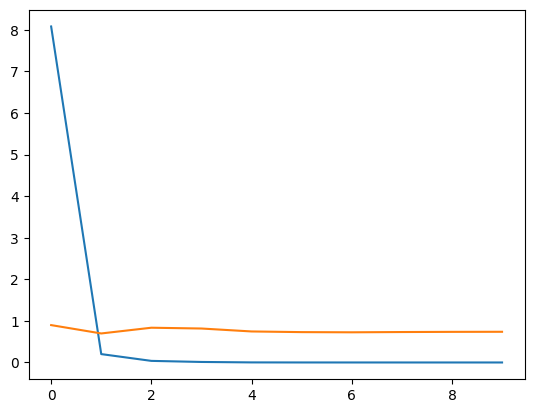

In [11]:
import pandas as pd
pd.Series(history.history['loss']).plot(kind='line')
pd.Series(history.history['val_loss']).plot(kind='line')

In [12]:
op = '/root/.keras/datasets/flower_photos/sunflowers/1008566138_6927679c8a.jpg'

img_op = cv2.imread(op)
img_op = cv2.resize(img,(180,180))
img_op = np.expand_dims(img_op,axis=0)
img_op = final_model.predict(img_op)

1/1 [==============================] - 1s 1s/step


In [13]:
op = class_labels[np.argmax(img_op)]
op

'roses'